In [3]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [4]:
malign_data = "D:\\hackathon\\archive (1)\\data\\test\\benign"
malign_data2 = "D:\\hackathon\\archive (1)\\data\\test\\malignant"
benign_data = "D:\\hackathon\\archive (1)\\data\\train\\benign"
benign_data2 = "D:\\hackathon\\archive (1)\\data\\train\\malignant"

df = pd.DataFrame() #hold the image arrays
y_values = []  # hold the image labels

count = 0

# I save all images to dataframe

for img_name in os.listdir(malign_data):
    img = cv2.imread(malign_data+"/"+img_name)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_one_column_arr = img_gray.reshape((img.shape[0]*img.shape[1]),1)  # (224*224, 1) = (50176, 1)
    df[str(count)] = img_one_column_arr[:,0]
    y_values.append(1) # 1 == Malign
    count += 1

for img_name in os.listdir(malign_data2):
    img = cv2.imread(malign_data2+"/"+img_name)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_one_column_arr = img_gray.reshape((img.shape[0]*img.shape[1]),1)  # (224*224, 1) = (50176, 1)
    df[str(count)] = img_one_column_arr[:,0]
    y_values.append(1) # 1 == Malign
    count += 1


for img_name in os.listdir(benign_data):
    img = cv2.imread(benign_data+"/"+img_name)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_one_column_arr = img_gray.reshape((img.shape[0]*img.shape[1]), 1)
    df[str(count)] = img_one_column_arr[:,0]
    y_values.append(0) # 0 = Benign
    count += 1

for img_name in os.listdir(benign_data2):
    img = cv2.imread(benign_data2+"/"+img_name)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_one_column_arr = img_gray.reshape((img.shape[0]*img.shape[1]), 1)
    df[str(count)] = img_one_column_arr[:,0]
    y_values.append(0) # 0 = Benign
    count += 1

C:\Users\vinod\AppData\Local\Temp\ipykernel_17004\2466552615.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[str(count)] = img_one_column_arr[:,0]
C:\Users\vinod\AppData\Local\Temp\ipykernel_17004\2466552615.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[str(count)] = img_one_column_arr[:,0]
C:\Users\vinod\AppData\Local\Temp\ipykernel_17004\2466552615.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider 

In [5]:
x_data = df.T

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_values, test_size=0.3, random_state=42)

In [68]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [69]:
y_prediction_nb = nb.predict(x_test)

cm_nb = confusion_matrix(y_test, y_prediction_nb)

In [70]:
score_nb = nb.score(x_test,y_test)
print("Naive Bayes Accuracy : ", score_nb)

Naive Bayes Accuracy :  0.6333333333333333


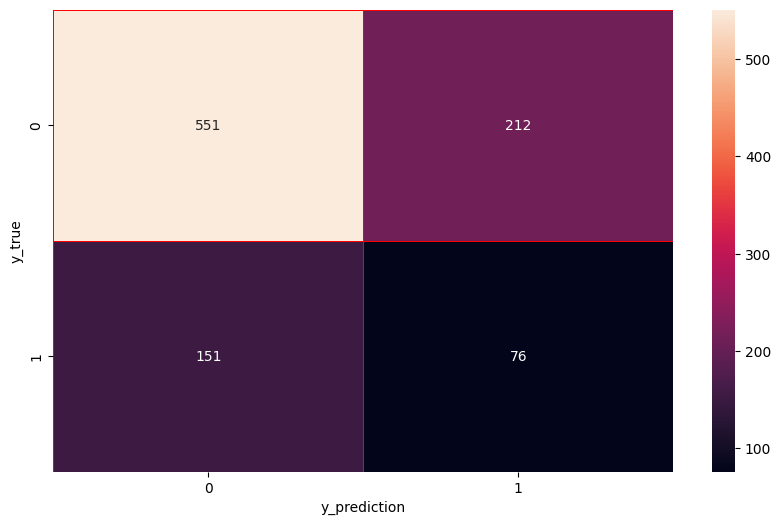

In [71]:
f, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(cm_nb, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_true")
plt.show()

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
score_rf = rf.score(x_test, y_test)
print("Random Forest Accuracy : ", score_rf)

Random Forest Accuracy :  0.7636363636363637


In [9]:
y_prediction_rf = rf.predict(x_test)

cm_rf = confusion_matrix(y_test, y_prediction_rf)

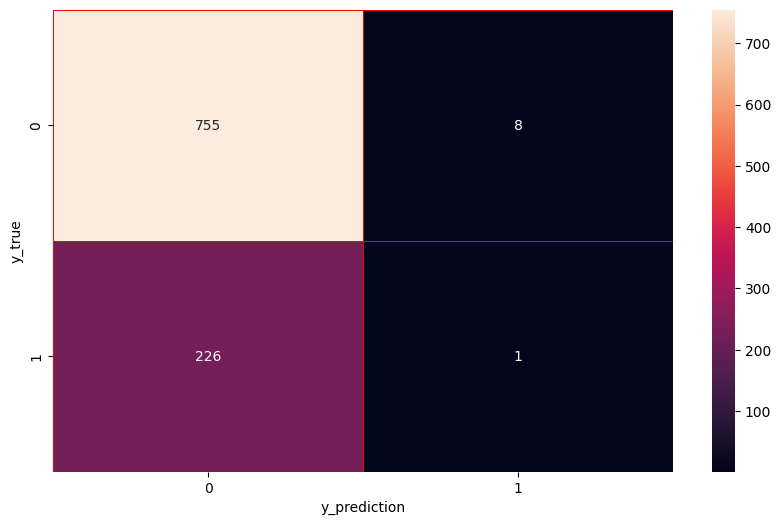

In [10]:
f, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(cm_rf, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_true")
plt.show()